<a href="https://colab.research.google.com/github/rndrpp/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/Predict_Customer_Personality_to_Boost_Marketing_Campaign_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
from sklearn.decomposition import PCA



sns.set_theme(style="darkgrid")
sns.set_palette("tab10")

In [2]:
# !pip install matplotlib --upgrade

# 1

In [3]:
df = pd.read_csv('marketing_campaign_data.csv', index_col = 0)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [6]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


In [7]:
df[cats].describe().T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12


In [8]:
df.isnull().any().sum()

1

## Feature Engineering

In [9]:
spending_col = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
transaction_col = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp_col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df['Age'] = 2022 - df['Year_Birth']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Spending'] = df[spending_col].sum(axis = 1)
df['Transactions'] = df[transaction_col].sum(axis = 1)
df['AcceptedCmps'] = df[cmp_col].sum(axis = 1)
df['CVR'] = df['Response']/df['NumWebVisitsMonth']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.loc[df['CVR'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Total_Spending,Transactions,AcceptedCmps,CVR
164,8475,1973,S3,Menikah,157243000.0,0,1,01-03-2014,98,20000,...,0,3,11,0,49,1,1608000,37,0,NaN
655,5555,1975,S1,Cerai,153924000.0,0,0,07-02-2014,81,1000,...,0,3,11,0,47,0,6000,0,0,NaN
687,1501,1982,S3,Menikah,160803000.0,0,0,04-08-2012,21,55000,...,0,3,11,0,40,0,1717000,44,0,NaN
905,11074,1977,S1,Lajang,85072000.0,0,0,09-04-2014,94,494000,...,0,3,11,0,45,0,1423000,18,0,NaN
975,10286,1962,S1,Menikah,83715000.0,0,0,03-02-2014,2,318000,...,0,3,11,0,60,0,926000,24,0,NaN
1773,8584,1952,S3,Bertunangan,85431000.0,0,0,08-06-2013,54,376000,...,0,3,11,0,70,0,1165000,17,0,NaN
1806,6237,1966,S3,Lajang,7144000.0,0,2,07-12-2013,92,81000,...,0,3,11,0,56,2,416000,25,0,NaN
1910,5832,1960,D3,Bertunangan,92556000.0,0,0,20-04-2014,32,493000,...,0,3,11,0,62,0,1263000,21,0,NaN
1955,6428,1950,S3,Janda,76842000.0,0,0,03-05-2014,37,605000,...,0,3,11,0,72,0,1130000,17,0,NaN
2132,11181,1949,S3,Menikah,156924000.0,0,0,29-08-2013,85,2000,...,0,3,11,0,73,0,8000,0,0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## EDA

In [13]:
df['Income'].describe(percentiles = [.25, .5, .75, .9])

count    2.216000e+03
mean     5.224725e+07
std      2.517308e+07
min      1.730000e+06
25%      3.530300e+07
50%      5.138150e+07
75%      6.852200e+07
90%      7.984400e+07
max      6.666660e+08
Name: Income, dtype: float64

In [14]:
df['Total_Spending'].describe(percentiles = [.25, .5, .75, .9])

count    2.240000e+03
mean     6.057982e+05
std      6.022493e+05
min      5.000000e+03
25%      6.875000e+04
50%      3.960000e+05
75%      1.045500e+06
90%      1.536200e+06
max      2.525000e+06
Name: Total_Spending, dtype: float64

In [15]:
df['Age'].describe(percentiles = [.25, .5, .75, .9])

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
90%        70.000000
max       129.000000
Name: Age, dtype: float64

In [16]:
def income_group(income):
    if income <= 20000000:
        return '0M-20M'
    elif income <= 40000000:
        return '20M-40M'
    elif income <= 60000000:
        return '40M-60M'
    elif income <= 80000000:
        return '60M-80M'
    elif income <= 100000000:
      return '80M-100M'
    else:
        return '>100M'

df['IncomeGroup'] = df['Income'].apply(lambda x : income_group(x))

In [17]:
def spending_group(spending):
    if spending <= 500000:
        return '0.0M-0.5M'
    elif spending <= 1000000:
        return '0.5M-1M'
    elif spending <= 1500000:
        return '1.0M-1.5M'
    elif spending <= 2000000:
        return '1.5M-2M'
    elif spending <= 2500000:
        return '2.0M-2.5M'
    else:
        return '>2.5M'

df['SpendingGroup'] = df['Total_Spending'].apply(lambda x : spending_group(x))

In [18]:
def age_group(age):
    if age <= 30:
        return '20-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '>70'

df['AgeGroup'] = df['Age'].apply(lambda x : age_group(x))

In [19]:
cvr_by_income = df.groupby('IncomeGroup').agg({'ID': 'count', 'CVR': 'mean'}).reset_index()
cvr_by_spending = df.groupby('SpendingGroup').agg({'ID': 'count', 'CVR': 'mean'}).reset_index()
cvr_by_age = df.groupby('AgeGroup').agg({'ID': 'count', 'CVR': 'mean'}).reset_index()

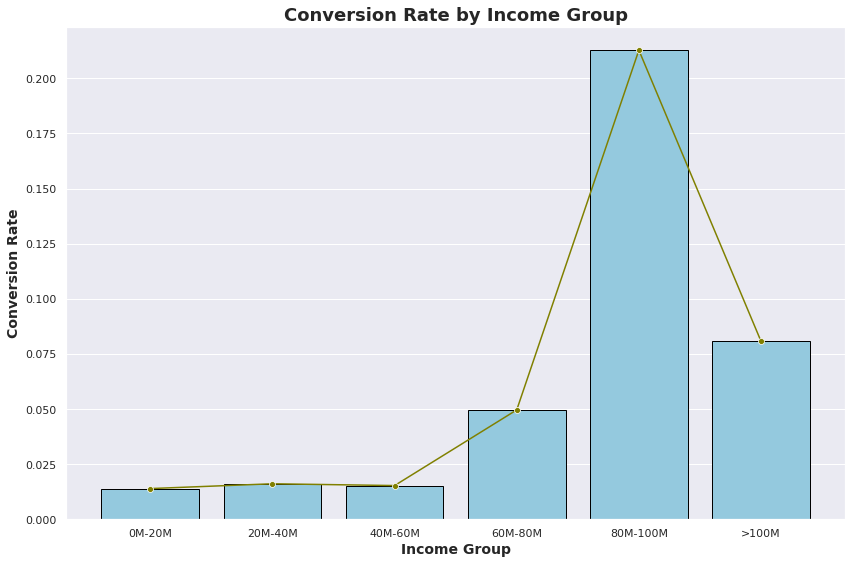

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=cvr_by_income, x='IncomeGroup', y='CVR', color='skyblue', edgecolor='black')
sns.lineplot(data=cvr_by_income, x='IncomeGroup', y='CVR', color='olive', marker= 'o')

ax.set_title("Conversion Rate by Income Group", fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Income Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold')
# sns.lineplot(data=cvr_by_age, x='AgeGroup', y='CVR', color='blue',
            #  marker='o', markersize=8, linewidth=3, ax=ax)
plt.tight_layout()
plt.show();

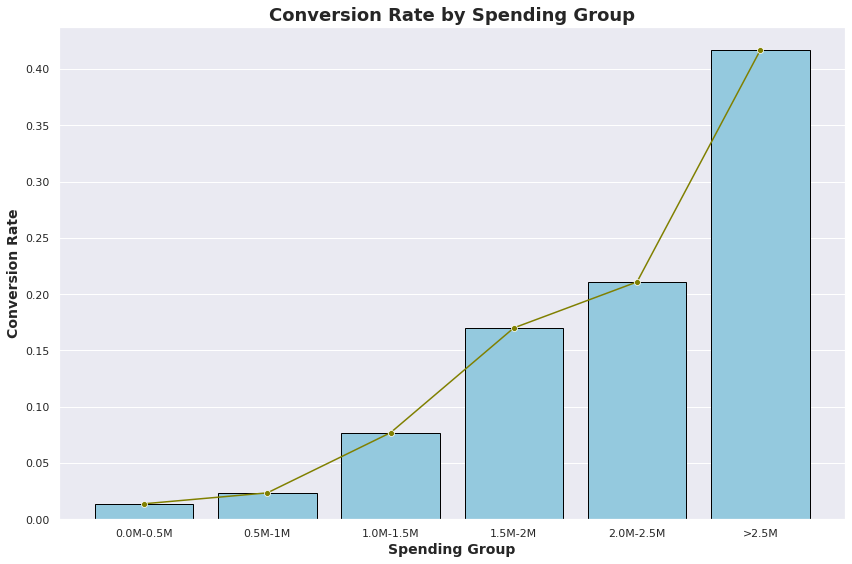

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=cvr_by_spending, x='SpendingGroup', y='CVR', color='skyblue', edgecolor='black')
sns.lineplot(data=cvr_by_spending, x='SpendingGroup', y='CVR', color='olive', marker= 'o')

ax.set_title("Conversion Rate by Spending Group", fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show();

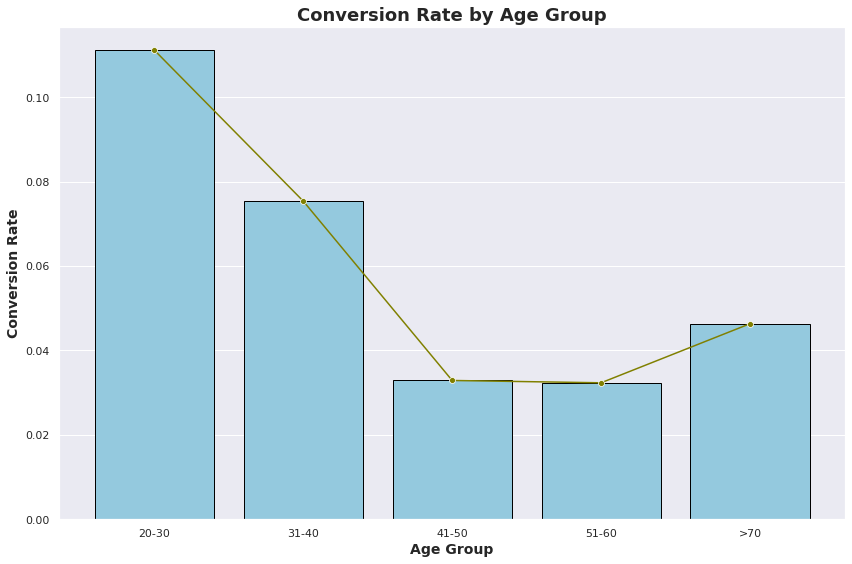

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=cvr_by_age, x='AgeGroup', y='CVR', color='skyblue', edgecolor='black')
sns.lineplot(data=cvr_by_age, x='AgeGroup', y='CVR', color='olive', marker= 'o')

ax.set_title("Conversion Rate by Age Group", fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Age Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold')
# sns.lineplot(data=cvr_by_age, x='AgeGroup', y='CVR', color='blue',
            #  marker='o', markersize=8, linewidth=3, ax=ax)
plt.tight_layout()
plt.show();

# 2

# PreProcessing

In [23]:
df_processed = df.copy()

## Handling Missing Values and Duplicates

In [24]:
df_processed.isnull().mean() * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntCoke                0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Age                    0.000000
Children               0.000000
Total_Sp

In [25]:
print(f'Jumlah null/missing value sebelum handling: {df_processed.isnull().sum().sum()}')
df_processed['Income'].fillna(df_processed['Income'].median(),inplace= True)
df_processed['CVR'].fillna(0,inplace= True)
print(f'Jumlah null/missing value setelah handling: {df_processed.isnull().sum().sum()}')

Jumlah null/missing value sebelum handling: 35
Jumlah null/missing value setelah handling: 0


In [26]:
df_processed.drop('ID', axis=1, inplace=True)
print(f'Jumlah duplicate sebelum handling: {df_processed.duplicated().sum()}')
df_processed.drop_duplicates(inplace=True)
print(f'Jumlah duplicate setelah handling: {df_processed.duplicated().sum()}')

Jumlah duplicate sebelum handling: 183
Jumlah duplicate setelah handling: 0


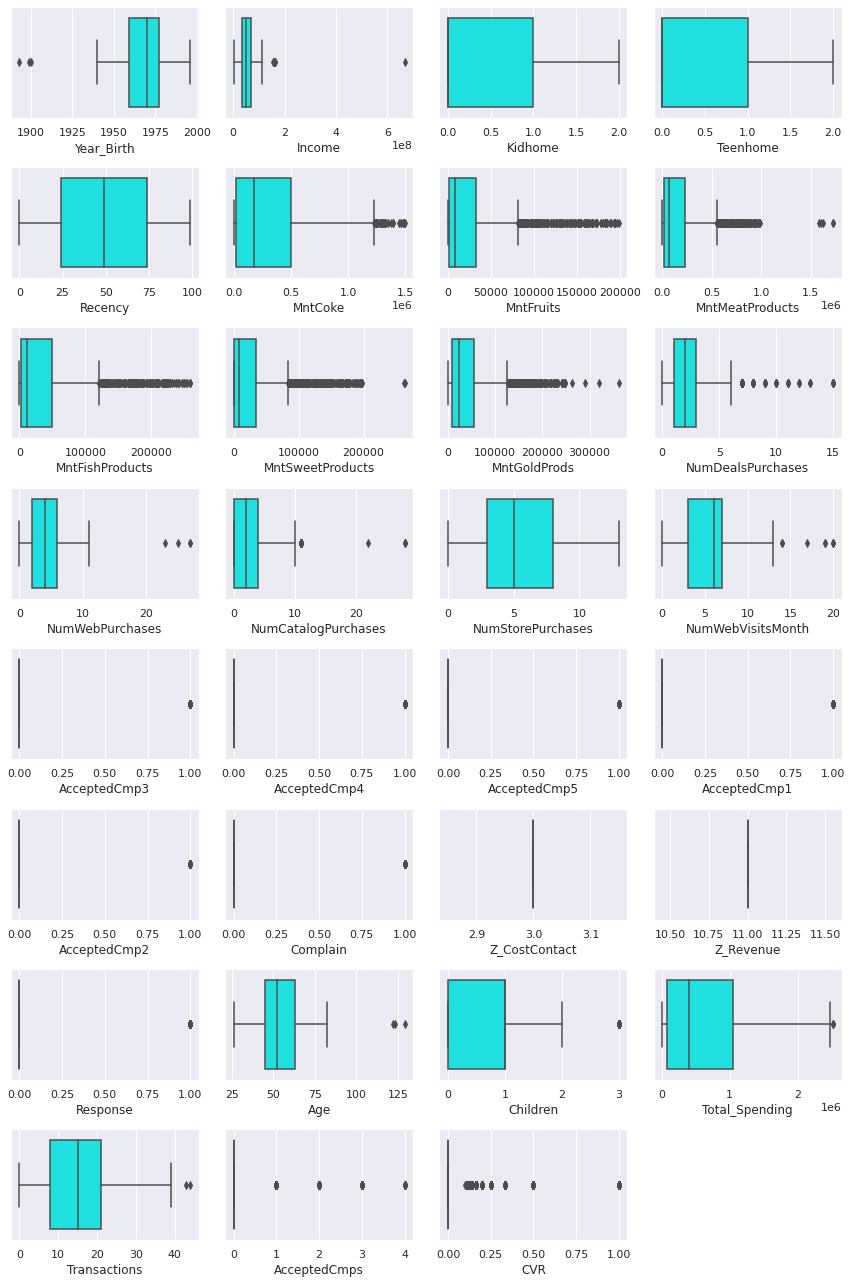

In [27]:
nums_processed = df_processed.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(12, 18))
for i, num in enumerate(nums_processed):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_processed[num], color='cyan')
    plt.xlabel(num)
    plt.tight_layout()

In [28]:
df_processed['Income'].describe(percentiles = [0.25, 0.5, 0.75, 0.9])

count    2.057000e+03
mean     5.234831e+07
std      2.538384e+07
min      1.730000e+06
25%      3.570100e+07
50%      5.138150e+07
75%      6.827400e+07
90%      7.980120e+07
max      6.666660e+08
Name: Income, dtype: float64

In [29]:
df_processed['Age'].describe(percentiles = [0.25, 0.5, 0.75, 0.9])

count    2057.000000
mean       53.214876
std        11.976449
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
90%        70.000000
max       129.000000
Name: Age, dtype: float64

In [30]:
df_processed['Transactions'].describe(percentiles = [0.25, 0.5, 0.75, 0.9])

count    2057.000000
mean       14.867282
std         7.664752
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
90%        25.000000
max        44.000000
Name: Transactions, dtype: float64

In [31]:
outliers = df_processed[(df_processed['Income']>150000000) | (df_processed['Age']>75) | (df_processed['Transactions']>40)].index
# # 
df_processed.drop(outliers, inplace=True)

In [32]:
drops = ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 
         'MntGoldProds', 'NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Z_CostContact', 'Z_Revenue', 
         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df_processed.drop(columns = drops, inplace=True, axis = 1)

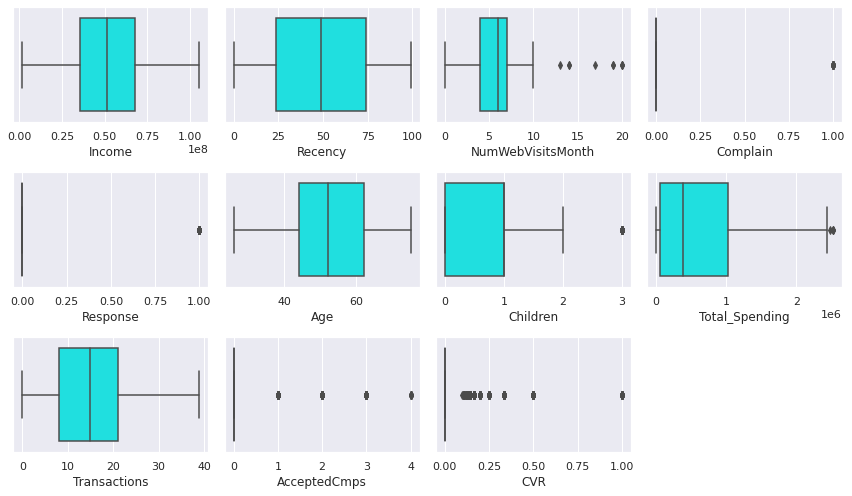

In [33]:
nums_processed = df_processed.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(12, 18))
for i, num in enumerate(nums_processed):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_processed[num], color='cyan')
    plt.xlabel(num)
    plt.tight_layout()

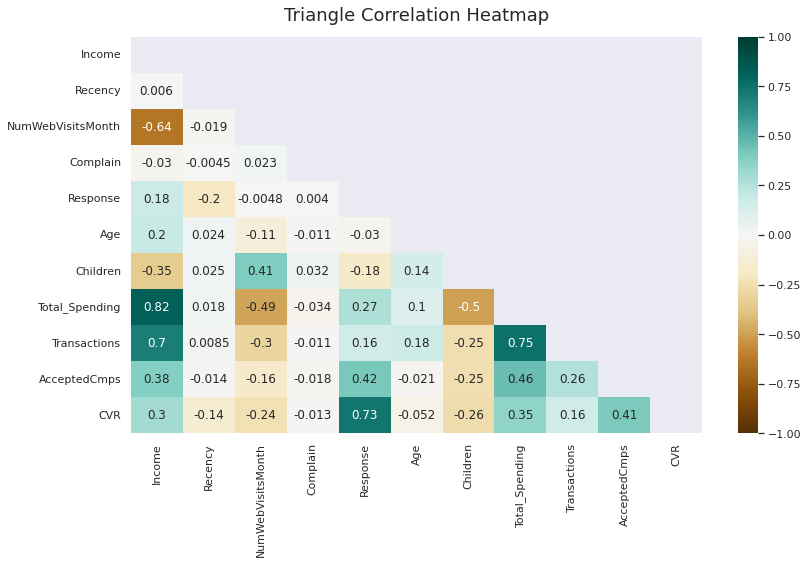

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

mask = np.triu(np.ones_like(df_processed.corr(), dtype=bool))
ax = sns.heatmap(df_processed.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show();

## Feature Encoding


In [35]:
df_encoded = df_processed.copy()

cats = df_encoded.select_dtypes(include='object').columns.tolist()
for cat in cats:
    print(f'{cat} total unique value: {df_encoded[cat].nunique()}')
    print(f'{cat} values: {df_encoded[cat].unique().tolist()} ', '\n')

Education total unique value: 5
Education values: ['S1', 'S3', 'S2', 'SMA', 'D3']  

Marital_Status total unique value: 6
Marital_Status values: ['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']  

IncomeGroup total unique value: 6
IncomeGroup values: ['40M-60M', '60M-80M', '20M-40M', '0M-20M', '>100M', '80M-100M']  

SpendingGroup total unique value: 6
SpendingGroup values: ['1.5M-2M', '0.0M-0.5M', '0.5M-1M', '1.0M-1.5M', '2.0M-2.5M', '>2.5M']  

AgeGroup total unique value: 5
AgeGroup values: ['>70', '51-60', '31-40', '41-50', '20-30']  



In [36]:
dummies = ['Education', 'Marital_Status', 'IncomeGroup', 'SpendingGroup', 'AgeGroup']
df_encoded = pd.get_dummies(df_encoded, columns = dummies, drop_first=True)

df_encoded.iloc[1:6, 11:]

,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,IncomeGroup_20M-40M,...,IncomeGroup_>100M,SpendingGroup_0.5M-1M,SpendingGroup_1.0M-1.5M,SpendingGroup_1.5M-2M,SpendingGroup_2.0M-2.5M,SpendingGroup_>2.5M,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_>70
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Feature Standarization

In [37]:
scaler = StandardScaler()
scale = ['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Children', 'Total_Spending', 'Transactions', 'AcceptedCmps']

for col in scale:
    df_encoded[col] = StandardScaler().fit_transform(df_encoded[col].values.reshape(-1, 1))

df_encoded[scale].head()

,Income,Recency,NumWebVisitsMonth,Age,Children,Total_Spending,Transactions,AcceptedCmps
0,0.324370,0.309091,0.675426,1.084346,-1.304589,1.700628,1.346394,-0.439613
1,-0.249919,-0.381710,-0.150779,1.349199,1.383452,-0.954474,-1.159176,-0.439613
2,0.980513,-0.796190,-0.563882,0.378072,-1.304589,0.296263,0.818906,-0.439613
3,-1.209081,-0.796190,0.262323,-1.299328,0.039432,-0.911057,-0.895432,-0.439613
4,0.331918,1.552533,-0.150779,-1.034475,0.039432,-0.294873,0.555161,-0.439613


# 3

## Clustering


In [38]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df_encoded)
  
    distortions.append(sum(np.min(cdist(df_encoded, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_encoded.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_encoded, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_encoded.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [39]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 2.796800848791392
3 : 2.6693241376495065
4 : 2.567159016178877
5 : 2.4915446076625236
6 : 2.441647747729644
7 : 2.392162426877126
8 : 2.3511703362681717
9 : 2.313345394908761


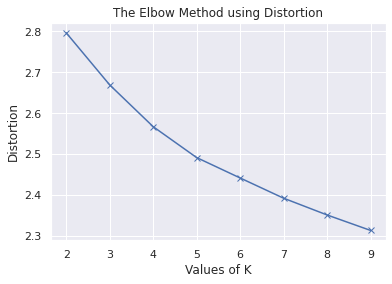

In [40]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [41]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 16597.62452538321
3 : 15056.630627157781
4 : 13890.489380643634
5 : 13038.401919341173
6 : 12534.607684888393
7 : 12075.483226185319
8 : 11662.823340313524
9 : 11335.768667879387


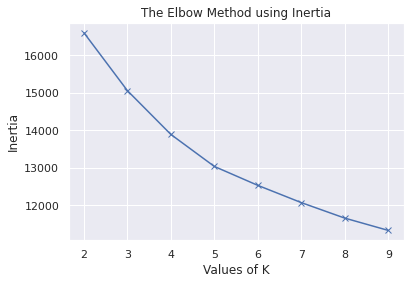

In [42]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [43]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(df_encoded)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(df_encoded)

In [44]:
df_clustered = df_processed.copy()
df_clustered['Cluster'] = clusters

df_clustered.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Spending,Transactions,AcceptedCmps,CVR,IncomeGroup,SpendingGroup,AgeGroup,Cluster
0,S1,Lajang,58138000.0,58,7,0,1,65,0,1617000,25,0,0.142857,40M-60M,1.5M-2M,>70,2
1,S1,Lajang,46344000.0,38,5,0,0,68,2,27000,6,0,0.000000,40M-60M,0.0M-0.5M,>70,1
2,S1,Bertunangan,71613000.0,26,4,0,0,57,0,776000,21,0,0.000000,60M-80M,0.5M-1M,51-60,2
3,S1,Bertunangan,26646000.0,26,6,0,0,38,1,53000,8,0,0.000000,20M-40M,0.0M-0.5M,31-40,1
4,S3,Menikah,58293000.0,94,5,0,0,41,1,422000,19,0,0.000000,40M-60M,0.0M-0.5M,41-50,2


In [45]:
pca = PCA(n_components=2)
pca.fit(df_encoded)

# Transfor the scaled data to the new PCA space
df_reduced = pca.transform(df_encoded)

In [46]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(df_reduced, index=df_encoded.index, columns=['PC1','PC2'])
X_reduceddf['Cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,Cluster
0,1.776295,-0.768509,2
1,-1.427028,-1.759477,1
2,1.609550,-0.063405,2
3,-1.930763,1.469614,1
4,-0.031661,0.386156,2


For n_clusters = 2 The average silhouette_score is : 0.2367197528981082
For n_clusters = 3 The average silhouette_score is : 0.16595389832218863
For n_clusters = 4 The average silhouette_score is : 0.14325697452707245
For n_clusters = 5 The average silhouette_score is : 0.13543048350235362
For n_clusters = 6 The average silhouette_score is : 0.1299983191886988
For n_clusters = 7 The average silhouette_score is : 0.11152079294364867
For n_clusters = 8 The average silhouette_score is : 0.110876281138998
For n_clusters = 9 The average silhouette_score is : 0.11053404504184157


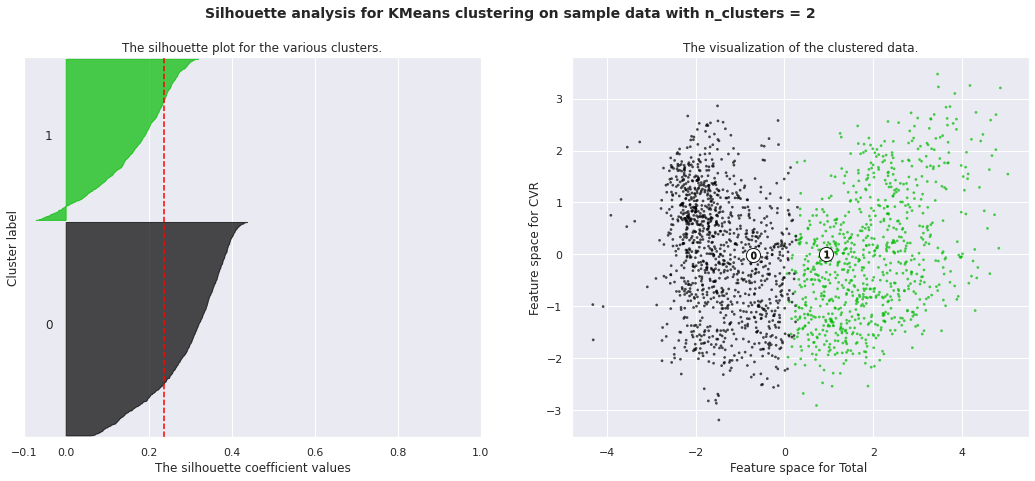

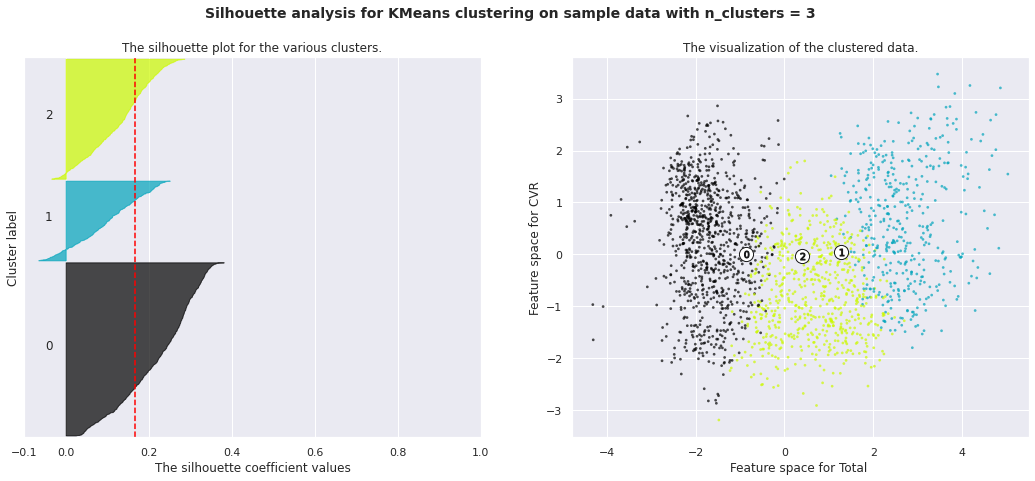

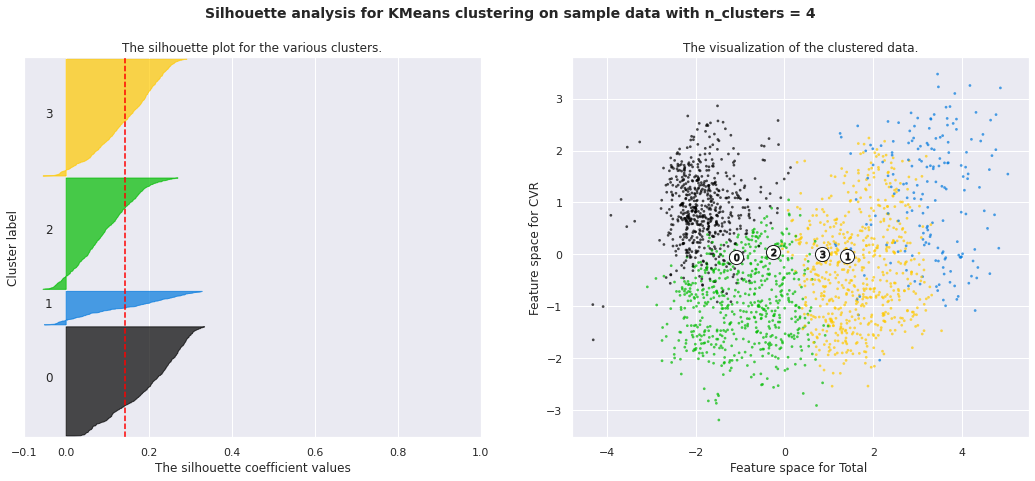

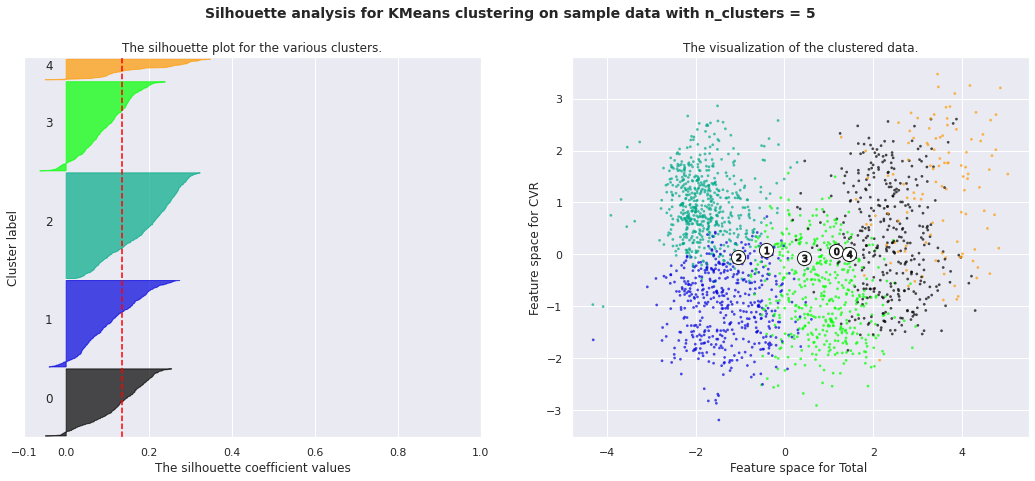

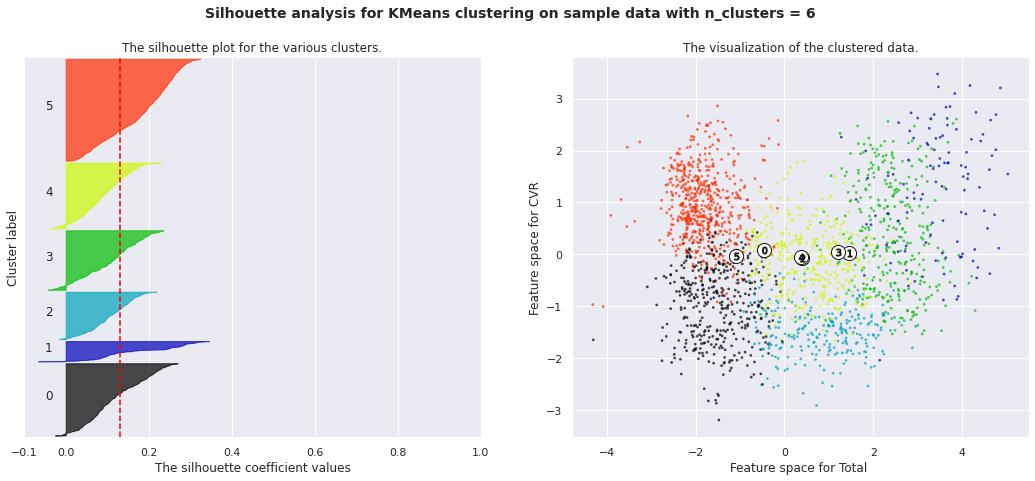

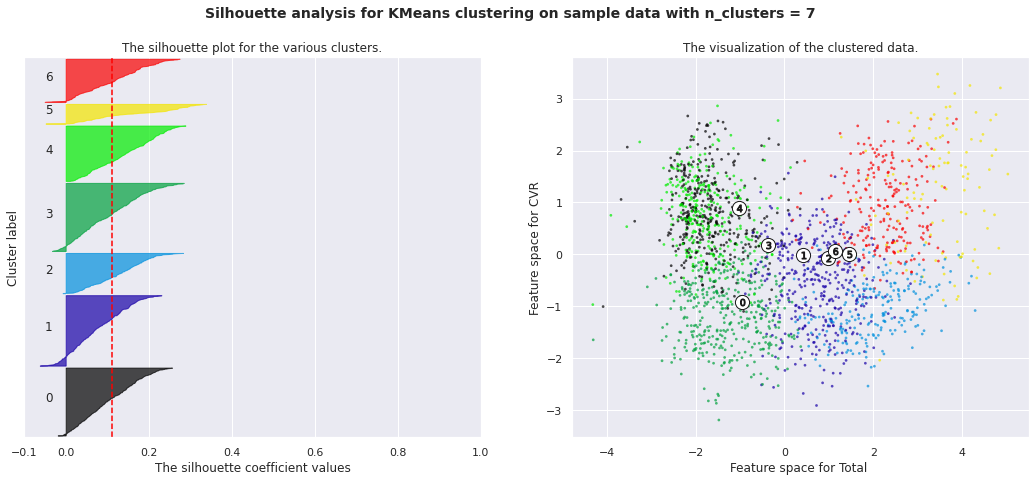

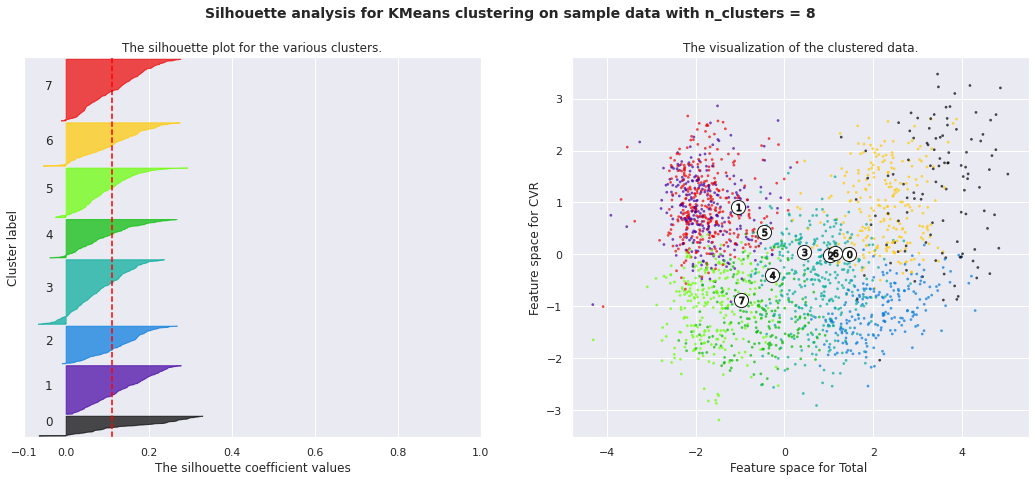

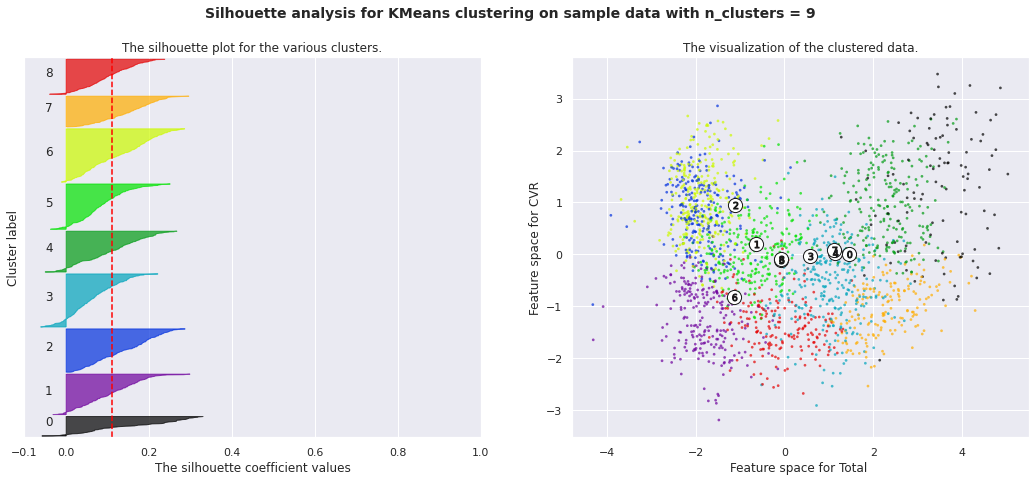

In [47]:
for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_encoded) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(df_encoded)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_encoded, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(
        X_reduceddf['PC1'], X_reduceddf['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for Total ")
    ax2.set_ylabel("Feature space for CVR")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [48]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2011 non-null   object 
 1   Marital_Status     2011 non-null   object 
 2   Income             2011 non-null   float64
 3   Recency            2011 non-null   int64  
 4   NumWebVisitsMonth  2011 non-null   int64  
 5   Complain           2011 non-null   int64  
 6   Response           2011 non-null   int64  
 7   Age                2011 non-null   int64  
 8   Children           2011 non-null   int64  
 9   Total_Spending     2011 non-null   int64  
 10  Transactions       2011 non-null   int64  
 11  AcceptedCmps       2011 non-null   int64  
 12  CVR                2011 non-null   float64
 13  IncomeGroup        2011 non-null   object 
 14  SpendingGroup      2011 non-null   object 
 15  AgeGroup           2011 non-null   object 
 16  Cluster            2011 

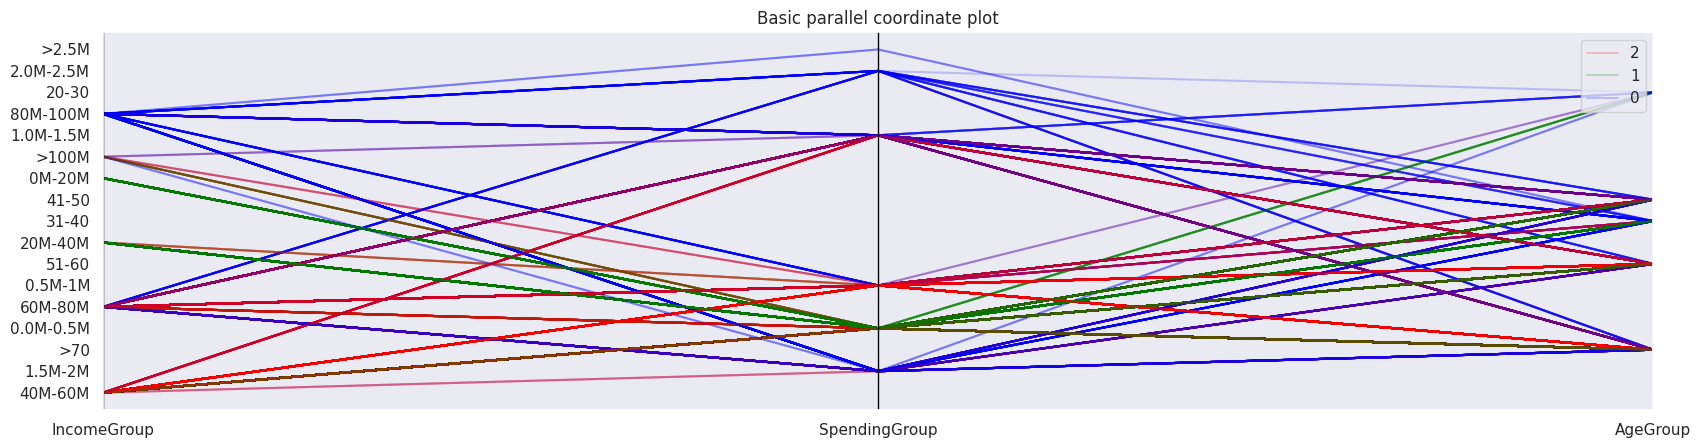

In [50]:
x_columns = ['IncomeGroup',	'SpendingGroup',	'AgeGroup']

y_column = ['Cluster']
columns = x_columns + y_column

fig, ax = plt.subplots(figsize=(20, 5), dpi=100)

_ = pd.plotting.parallel_coordinates(df_clustered, 'Cluster', x_columns, color=['red', 'blue', 'green'], sort_labels=True, axvlines=True, alpha=0.2, ax=ax)
_ = ax.set_title('Basic parallel coordinate plot')

In [51]:
cluster_by_income = df_clustered.groupby(['Cluster', 'IncomeGroup'])['CVR'].mean().unstack(level=0)
cluster_by_income

Cluster,0,1,2
IncomeGroup,,,
0M-20M,NaN,0.014275,0.000000
20M-40M,NaN,0.016302,0.055996
40M-60M,0.053571,0.008826,0.019080
60M-80M,0.096358,0.000000,0.014920
80M-100M,0.216351,NaN,0.000000
>100M,0.226190,0.000000,0.000000


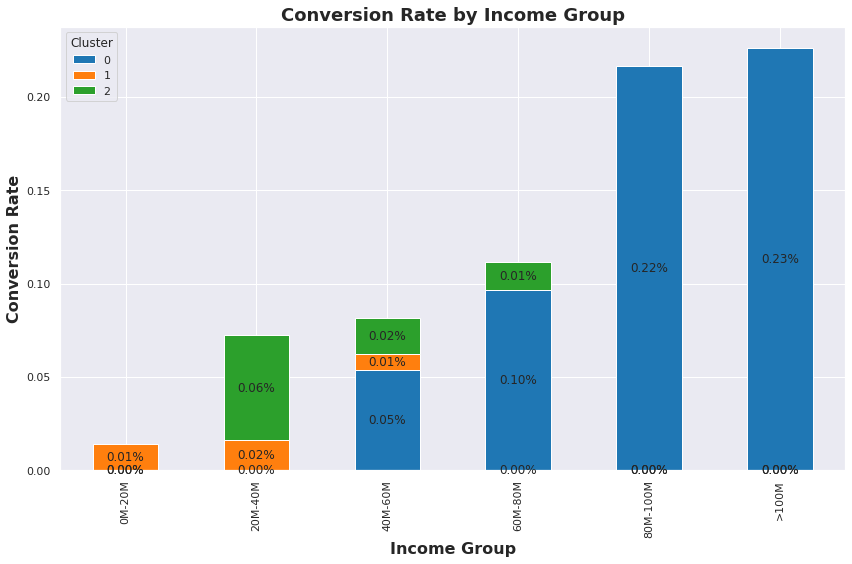

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_income.plot(kind='bar', stacked=True, ax = ax)

for c in ax.containers:
  ax.bar_label(c, fmt='%.2f%%', label_type = 'center')

ax.set_title('Conversion Rate by Income Group', fontsize=18, fontweight='bold')
ax.set_xlabel('Income Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
cluster_by_spending = df_clustered.groupby(['Cluster', 'SpendingGroup'])['CVR'].mean().unstack(level=0)
cluster_by_spending

Cluster,0,1,2
SpendingGroup,,,
0.0M-0.5M,0.000000,0.013500,0.017527
0.5M-1M,0.070282,0.055556,0.013639
1.0M-1.5M,0.114592,NaN,0.019488
1.5M-2M,0.193493,NaN,0.039021
2.0M-2.5M,0.222708,NaN,0.000000
>2.5M,0.416667,NaN,NaN


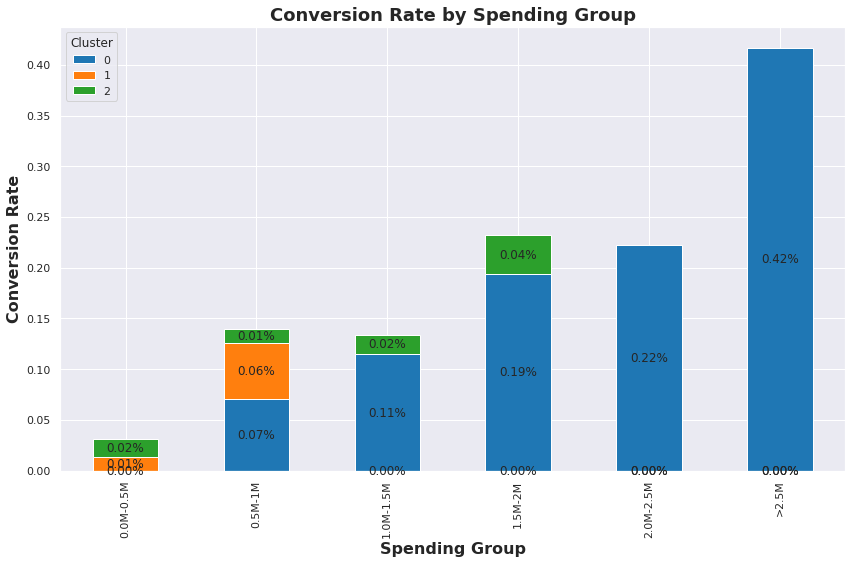

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_spending.plot(kind='bar', stacked=True, ax = ax)

for c in ax.containers:
  ax.bar_label(c, fmt='%.2f%%', label_type = 'center')

ax.set_title('Conversion Rate by Spending Group', fontsize=18, fontweight='bold')
ax.set_xlabel('Spending Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [55]:
cluster_by_age = df_clustered.groupby(['Cluster', 'AgeGroup'])['CVR'].mean().unstack(level=0)
cluster_by_age

Cluster,0,1,2
AgeGroup,,,
20-30,0.200000,0.012346,0.000000
31-40,0.215827,0.017880,0.015385
41-50,0.123295,0.014701,0.010666
51-60,0.109985,0.013320,0.016833
>70,0.138269,0.006690,0.020796


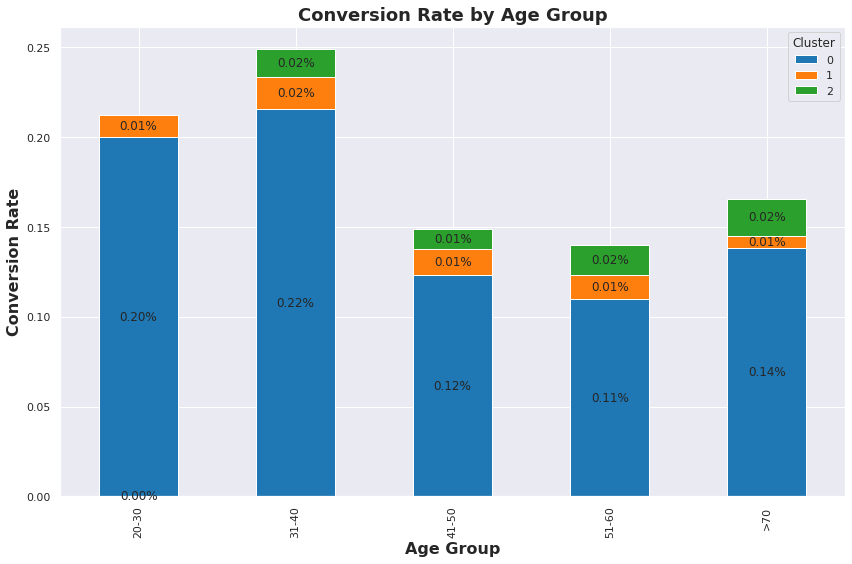

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_age.plot(kind='bar', stacked=True, ax = ax)

for c in ax.containers:
  ax.bar_label(c, fmt='%.2f%%', label_type = 'center')

ax.set_title('Conversion Rate by Age Group', fontsize=18, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Conversion Rate', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()